In [1]:
!pip install kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"seokyunkang","key":"ce78554f329f0332afd8754e90ac1ac2"}'}

In [2]:
ls -1ha kaggle.json

kaggle.json


In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
# Permission Warning이 발생하지 않도록 해줍니다.
!chmod 600 ~/.kaggle/kaggle.json
# 내가 참가한 대회 리스트 확인
!kaggle competitions list

ref                                            deadline             category            reward  teamCount  userHasEntered  
---------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
contradictory-my-dear-watson                   2030-07-01 23:59:00  Getting Started     Prizes         90           False  
gan-getting-started                            2030-07-01 23:59:00  Getting Started     Prizes         93           False  
store-sales-time-series-forecasting            2030-06-30 23:59:00  Getting Started  Knowledge        954           False  
tpu-getting-started                            2030-06-03 23:59:00  Getting Started  Knowledge        158           False  
digit-recognizer                               2030-01-01 00:00:00  Getting Started  Knowledge       1756           False  
titanic                                        2030-01-01 00:00:00  Getting Started  Knowledge      14425           False  
house-pr

In [4]:
!kaggle competitions download -c titanic

  0% 0.00/28.0k [00:00<?, ?B/s]
100% 28.0k/28.0k [00:00<00:00, 11.1MB/s]
  0% 0.00/3.18k [00:00<?, ?B/s]
100% 3.18k/3.18k [00:00<00:00, 3.34MB/s]
  0% 0.00/59.8k [00:00<?, ?B/s]
100% 59.8k/59.8k [00:00<00:00, 73.1MB/s]


In [5]:
!ls

gender_submission.csv  kaggle.json  sample_data  test.csv  train.csv


In [6]:
import pandas as pd

In [7]:
data = pd.read_csv("./train.csv")

In [8]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


|Variable|Description|
|-----|---|
|Survived|1: 생존, 0: 사망|
|Pclass|1: 1등석, 2: 2등석, 3: 3등석|
|Name|승객 이름|
|Sex|승객의 성별|
|Age|승객의 나이|
|Sibsp|함께 탑승한 형제 또는 배우자의 수|
|Parch|함께 탑승한 부모 또는 자녀의 수|
|Ticket|티켓 번호|
|Fare|티켓 요금|
|Cabin|선실 번호|
|Embarked|탑승한 항구|
[표 1] 데이터 변수와 의미


- 데이터의 맨 위 5개의 관측치(head)

In [9]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


- 데이터의 맨 아래 5개의 관측치(tail)

1. Fare: 사람들마다 값의 차이가 큼
2. Name: 정해진 형식이 없음(따옴표 또는 괄호 확인 가능)
3. Sex: 문자 형태로 데이터가 제공되어 Encoding 필요
4. Ticket: 숫자로만 이루어진 값과 알파벳이 섞인 값 존재
5. Cabin, Age: 결측치(NaN) 확인 가능
6. Embarked: 값이 S, C, Q로 표현되는데, 의미 확인 필요

In [10]:
data['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [11]:
data[data['Fare'] > 500]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


- 요금이 500이 넘는 승객은 1등급 좌석 사용
- Ticket의 값이 동일

In [12]:
data[data['Fare'] == 0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S


- 요금이 0인 승객은 나이의 결측치가 많이 확인됨
- Embarked 변수의 값이 모두 S인 것을 확인할 수 있음
- 몇몇은 Ticket 변수의 값이 LINE인 것도 확인 가능

In [13]:
data[data['Age'] < 5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.00,1,1,PP 9549,16.7000,G6,S
16,17,0,3,"Rice, Master. Eugene",male,2.00,4,1,382652,29.1250,NaN,Q
43,44,1,2,"Laroche, Miss. Simonne Marie Anne Andree",female,3.00,1,2,SC/Paris 2123,41.5792,NaN,C
63,64,0,3,"Skoog, Master. Harald",male,4.00,3,2,347088,27.9000,NaN,S
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.00,4,2,347082,31.2750,NaN,S
164,165,0,3,"Panula, Master. Eino Viljami",male,1.00,4,1,3101295,39.6875,NaN,S
171,172,0,3,"Rice, Master. Arthur",male,4.00,4,1,382652,29.1250,NaN,Q
172,173,1,3,"Johnson, Miss. Eleanor Ileen",female,1.00,1,1,347742,11.1333,NaN,S


- 나이가 어려도 요금을 지불하는 모습을 확인 가능

In [14]:
data[data['Ticket'] == 'LINE']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S


- Ticket이 LINE이라면 요금이 0이고 3등석을 사용

In [15]:
import numpy as np
from sklearn.metrics import accuracy_score
import pandas as pd
import re
import sklearn
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

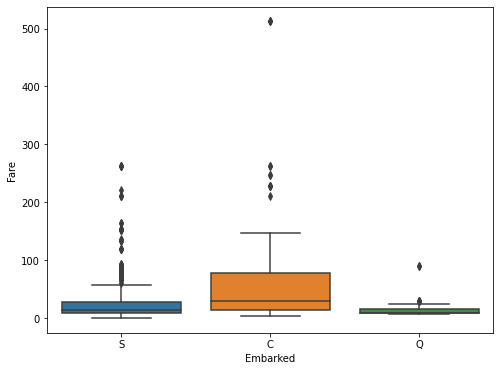

In [16]:
data2 = pd.concat([data['Fare'], data['Embarked']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='Embarked', y="Fare", data=data2)

- 탑승한 항구(운임 거리)와 요금 간의 상관관계를 체크하기 위한 히스토그램
- C에서의 이상치는 다른 값들과는 달리 멀리 떨어져 있는 것을 확인 가능
- 1등석이나 VIP석을 사용했을 것으로 추정


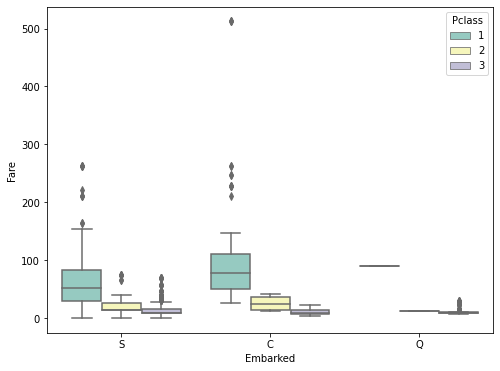

In [17]:
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x="Embarked", y="Fare", hue="Pclass",
               data=data, palette="Set3")

- 같은 Pclass 내에서도 요금차이가 있는 것으로 보아 세부적으로 클래스가 나뉠 가능성 있음

Text(0.5, 1.0, 'Total Missing Value (%)')

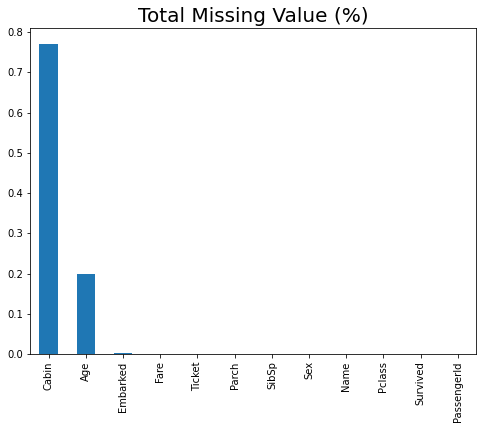

In [18]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
percent_data = percent.head(20)
percent_data.plot(kind="bar", figsize = (8,6), fontsize = 10)
plt.xlabel("", fontsize = 20)
plt.ylabel("", fontsize = 20)
plt.title("Total Missing Value (%)", fontsize = 20)

- 결측치는 Cabin, Age, Embarked에서 발생

Text(0.5, 1.0, 'Correlation with Missing Values')

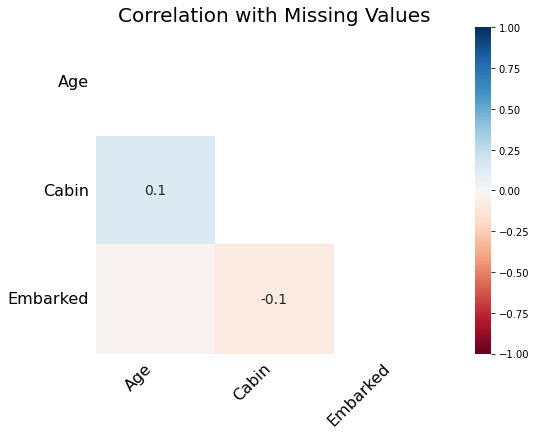

In [19]:
import missingno as msno
missingdata = data.columns[data.isnull().any()].tolist()
msno.heatmap(data[missingdata], figsize=(8,6))
plt.title("Correlation with Missing Values", fontsize = 20)

- 상관계수로 보아 결측치끼리 상관성은 크게 없는 것으로 보임
- Cabin의 결측치가 많은 것으로 보아 사물함을 배정받지 않아 생긴 결측이라고 예상 가능

In [20]:
data['hasCabin'] = data['Cabin'].isnull().apply(lambda x: 0 if x == True else 1)
data['hasAge'] = data['Age'].isnull().apply(lambda x: 0 if x == True else 1)

- hasCabin: Cabin이 결측치면 0, 그렇지 않으면 1
- hasAge: Age가 결측치면 0, 그렇지 않으면 1


In [21]:
data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,hasCabin,hasAge
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,0.019919,0.020167
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,0.316912,0.092197
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,-0.725541,-0.172933
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.249732,NaN
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.040460,-0.018958
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,0.036987,0.124104
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,0.482075,0.100707
hasCabin,0.019919,0.316912,-0.725541,0.249732,-0.040460,0.036987,0.482075,1.000000,0.144111
hasAge,0.020167,0.092197,-0.172933,NaN,-0.018958,0.124104,0.100707,0.144111,1.000000


- hasCabin같은 경우 Pclass와 Fare와 높은 상관관계를 가지는 것을 볼 수 있음

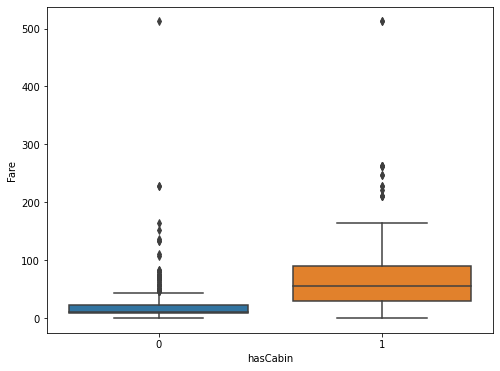

In [22]:
data3 = pd.concat([data['Fare'], data['hasCabin']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='hasCabin', y="Fare", data=data3)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


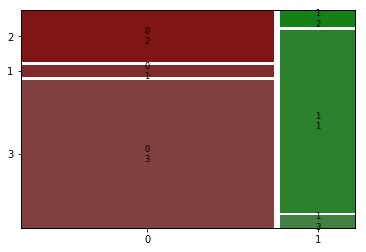

In [23]:
from statsmodels.graphics.mosaicplot import mosaic
mosaic(data, ['hasCabin', 'Pclass'],gap=0.02)
plt.show()

- 사물함을 사용하고 있을수록 1등석을 사용하는 사실 확인 가능
- 3등석을 사용하고 있는 사람은 사물함이 대부분 없다는 사실을 확인 가능
- 평균적으로 사물함이 있는 사람들은 티켓 요금이 평균적으로 높다는 것을 확인할 수 있음

In [24]:
data[data['Embarked'].isnull()] 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,hasCabin,hasAge
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,1,1
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,1,1


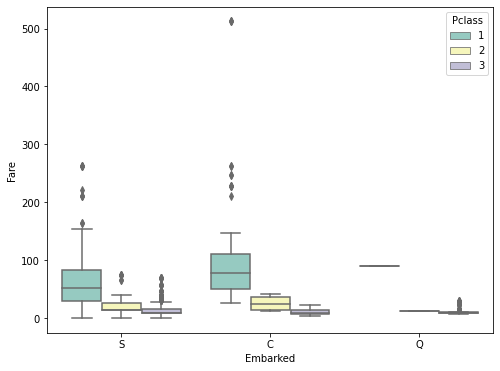

In [28]:
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x="Embarked", y="Fare", hue="Pclass",
               data=data, palette="Set3")

In [30]:
# 특정 행의 열을 채우는 방법 
data.loc[61, 'Embarked'] = 'S'
data.loc[829, 'Embarked'] = 'S'

# 특정 열의 결측치를 채우는 방법 
data['Embarked'] = data['Embarked'].fillna('S')

- 합리적 접근법: 다른 변수와의 관계를 이용해서 결측치를 채우는 방식
- Pclass와 Embarked 별로 Fare가 다른 것을 볼 수 있음

In [25]:
data.shape[0]

891

In [26]:
a = data.dropna(axis = 0)


b = data.dropna(axis = 1)

c = data[data['Cabin'].notnull()]
print(a.shape, b.shape, c.shape)

(183, 14) (891, 11) (204, 14)


- 완전 제거법: 결측치가 있는 행 자체를 지워버리는 방식
- Cabin처럼 결측치가 80%에 가까운 경우에 사용
- bias가 생길 수 있으므로 접근할 때 주의를 기울여야 함